### Load Functions

In [1]:
from simple_trade import compute_indicator, download_data
import pandas as pd
from simple_trade import IndicatorPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Create a plotter instance
plotter = IndicatorPlotter()

### The Average Directional Index (ADX) 

In [2]:
# Step 1: Download data
symbol = 'TSLA'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
window=14
data = compute_indicator(
    data=data,
    indicator='adx',
    window=window,
    high_col='High',
    low_col='Low',
    close_col='Close'
)

data.head(5)


Computing ADX...


,Adj Close,Close,High,Low,Open,Volume,ADX_14,+DI_14,-DI_14
Date,,,,,,,,,
2024-01-02,248.419998,248.419998,251.250000,244.410004,250.080002,104654200,NaN,NaN,NaN
2024-01-03,238.449997,238.449997,245.679993,236.320007,244.979996,121082600,NaN,NaN,NaN
2024-01-04,237.929993,237.929993,242.699997,237.729996,239.250000,102629300,NaN,NaN,NaN
2024-01-05,237.490005,237.490005,240.119995,234.899994,236.860001,92379400,NaN,NaN,NaN
2024-01-08,240.449997,240.449997,241.250000,235.300003,236.139999,85166600,NaN,NaN,NaN


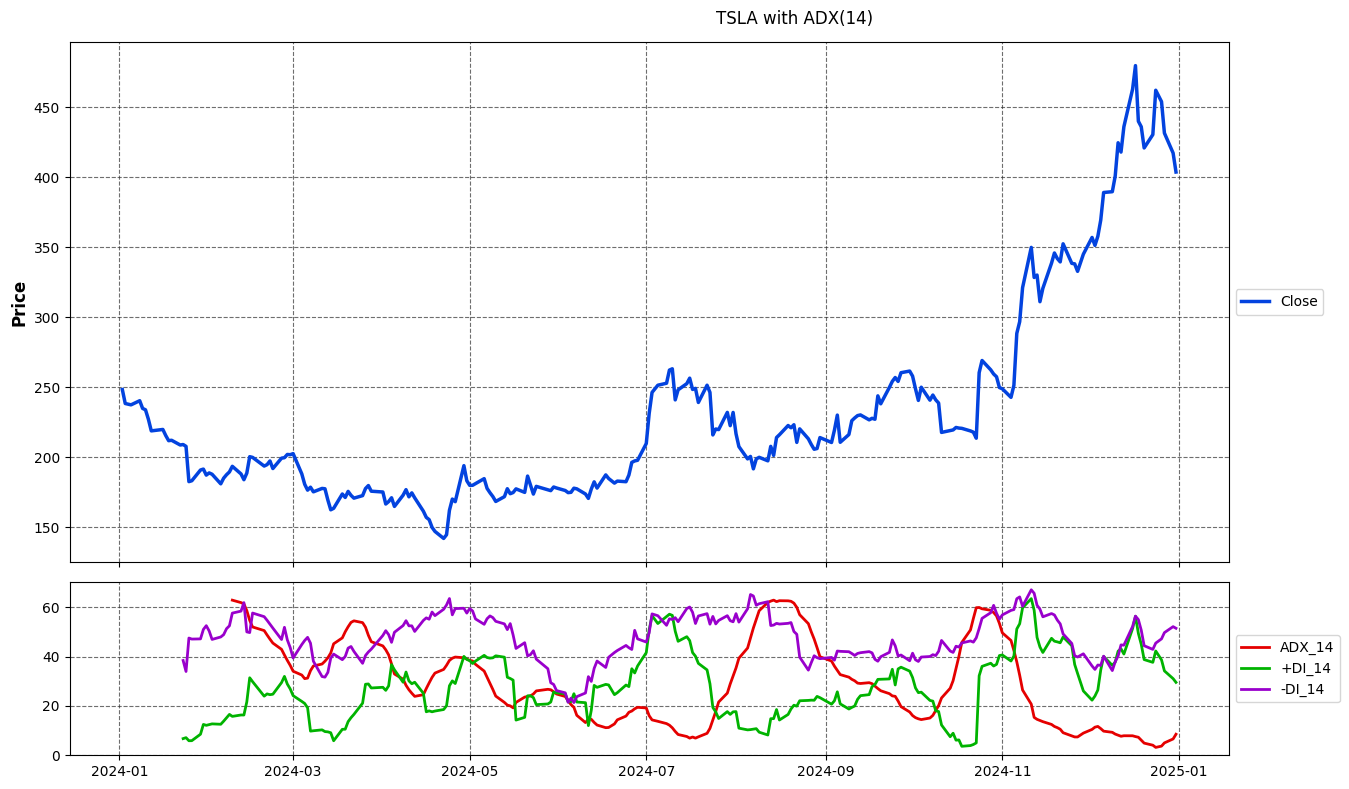

In [3]:
# Step 3: Plot the indicator
columns = [f'ADX_{window}', f'+DI_{window}', f'-DI_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with ADX({window})"
    )

### The Aroon indicator (Aroon)


Computing AROON...


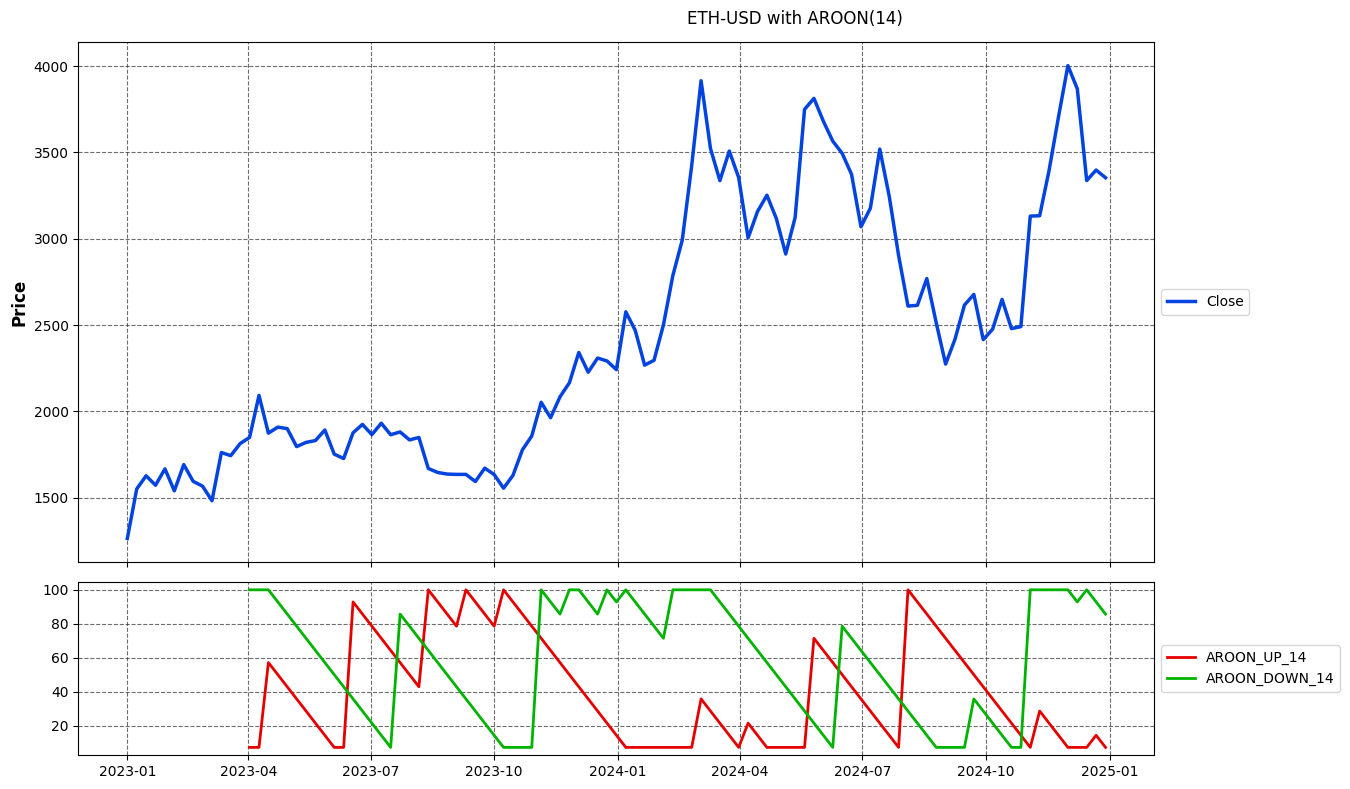

In [4]:
# Step 1: Download data
symbol = 'ETH-USD'
start = '2023-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval) # end_date is optional

# Step 2: Calculate indicator
period=14
data = compute_indicator(
    data=data,
    indicator='aroon',
    period=period,
    high_col='High',
    low_col='Low'
)

# Step 3: Plot the indicator
columns = [f'AROON_UP_{period}', f'AROON_DOWN_{period}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with AROON({period})"
    )

### The Exponential Moving Average Index (EMA)


Computing EMA...


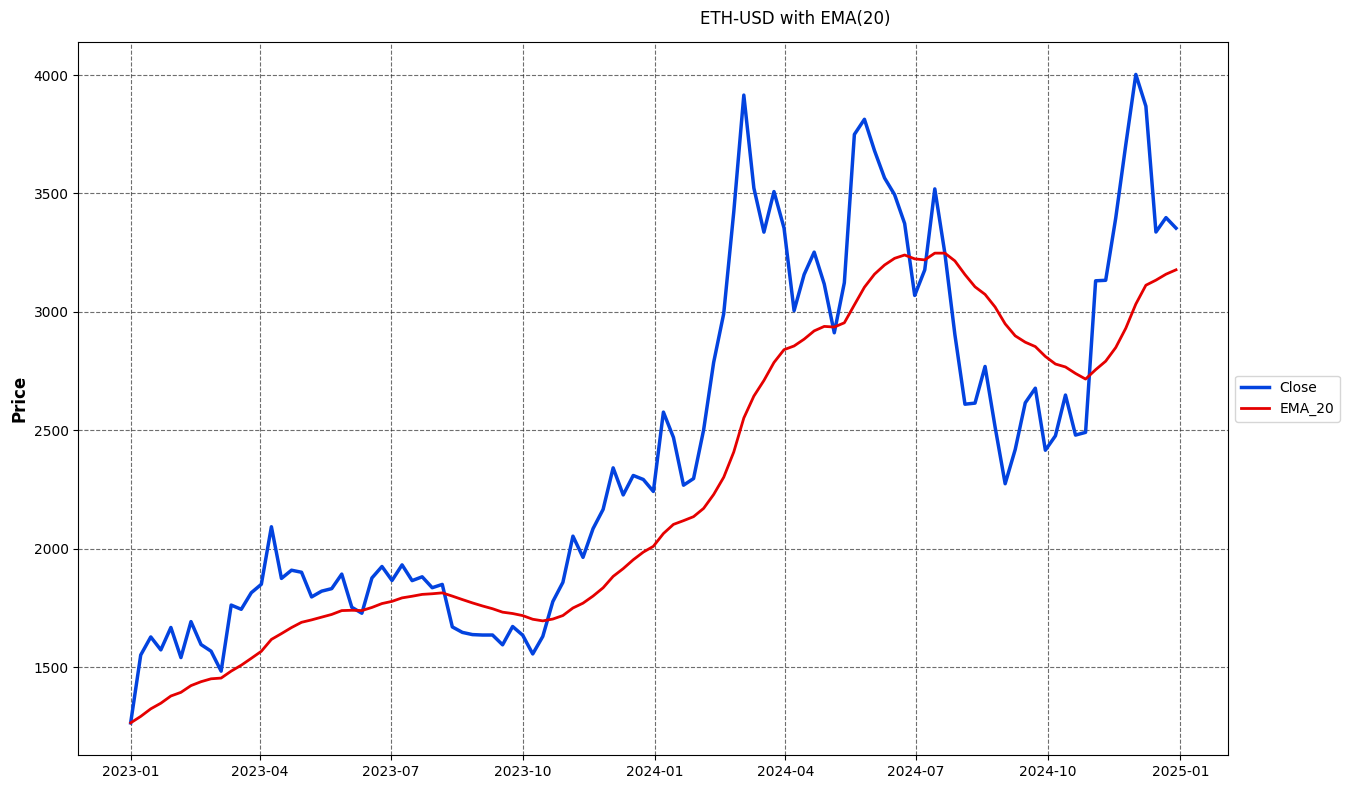

In [5]:
# Step 1: Download data
symbol = 'ETH-USD'
start = '2023-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval) # end_date is optional

# Step 2: Calculate indicator
window=20
data = compute_indicator(
    data=data,
    indicator='ema',
    window=window,
    close_col='Close'
)

# Step 3: Plot the indicator
columns = [f'EMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with EMA({window})"
    )

### The Hull Moving Average Index (HMA)


Computing HMA...


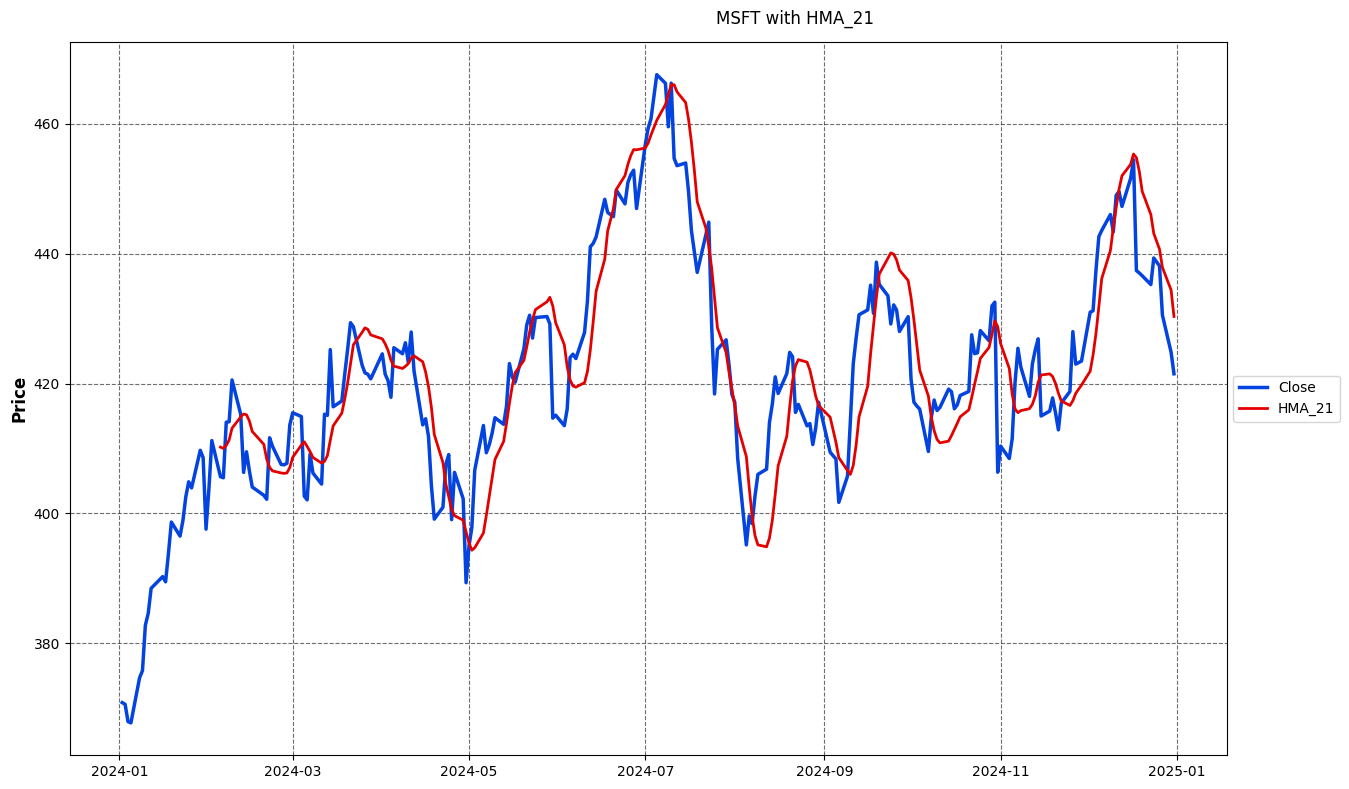

In [6]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
window=21
data = compute_indicator(
    data=data,
    indicator='hma',
    window=window,
    close_col='Close'
)

# Step 3: Plot the indicator
columns = [f'HMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with HMA_{window}"
    )

### Ichimoku Cloud indicators (ICHI)

In [7]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-06-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
tenkan_period = 9
kijun_period = 26
senkou_b_period = 52
displacement = 26
data = compute_indicator(
    data=data,
    indicator='ichimoku',
    tenkan_period=tenkan_period,
    kijun_period=kijun_period,
    senkou_b_period=senkou_b_period,
    displacement=displacement,
    high_col='High',
    low_col='Low',
    close_col='Close'
)

data.tail(5)


Computing ICHIMOKU...


,Adj Close,Close,High,Low,Open,Volume,tenkan_sen_9,kijun_sen_26,senkou_span_a_9_26,senkou_span_b_52,chikou_span_26
Date,,,,,,,,,,,
2025-05-05,436.170013,436.170013,439.500000,432.109985,432.869995,20136100,406.259995,392.145004,393.419998,412.645004,NaN
2025-05-06,433.309998,433.309998,437.730011,431.170013,432.200012,15104200,407.345001,392.145004,392.062492,412.645004,NaN
2025-05-07,433.350006,433.350006,438.119995,431.109985,433.839996,23307200,411.970001,392.145004,385.052490,407.809998,NaN
2025-05-08,438.170013,438.170013,443.670013,435.660004,437.929993,23491300,414.055008,394.230011,384.144989,407.809998,NaN
2025-05-09,438.730011,438.730011,440.739990,435.880005,440.000000,15313100,414.055008,394.230011,384.144989,407.809998,NaN


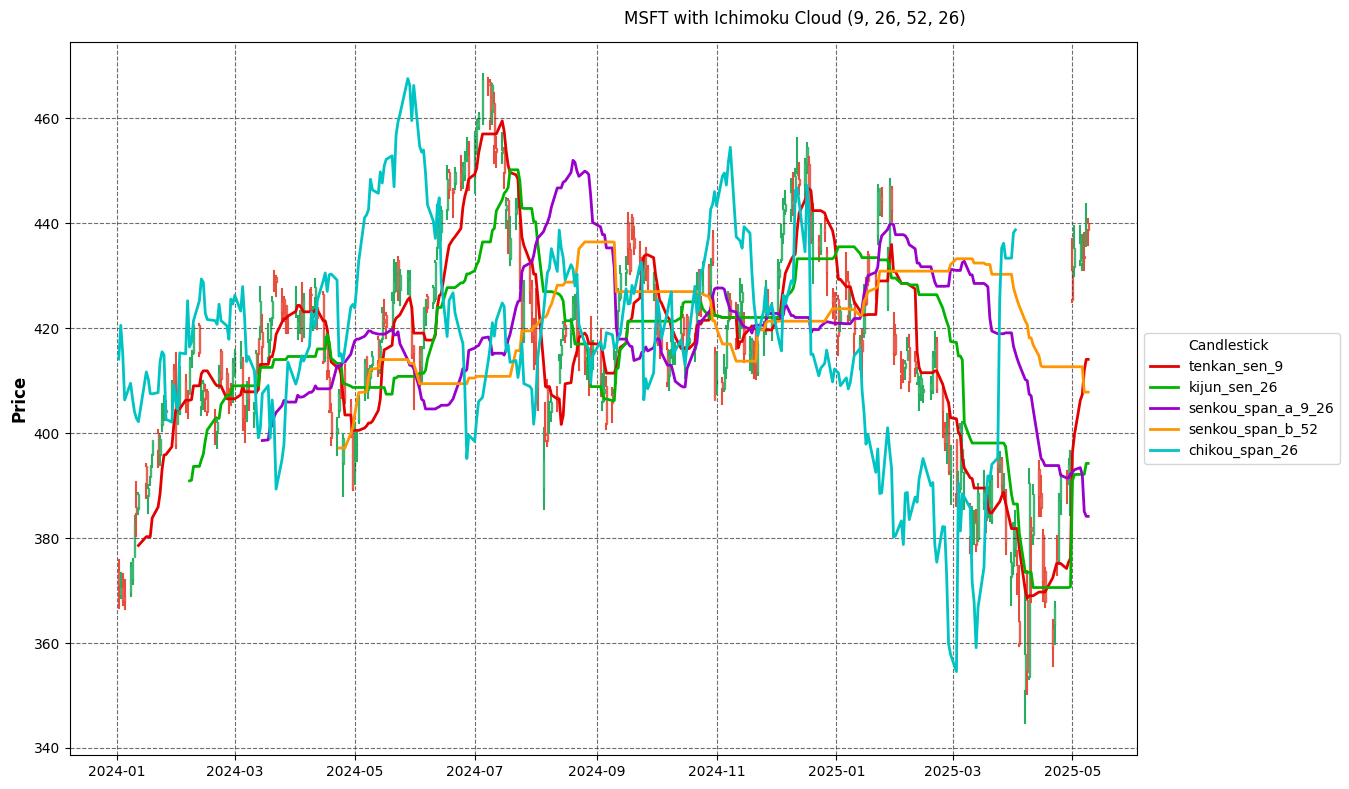

In [8]:
# Step 3: Plot the indicator
columns = [f'tenkan_sen_{tenkan_period}', 
           f'kijun_sen_{kijun_period}', 
           f'senkou_span_a_{tenkan_period}_{kijun_period}', 
           f'senkou_span_b_{senkou_b_period}', 
           f'chikou_span_{displacement}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False,
        plot_type='candlestick',
        title=f"{symbol} with Ichimoku Cloud ({tenkan_period}, {kijun_period}, {senkou_b_period}, {displacement})"
    )

### The Parabolic SAR Index (PSAR)

In [9]:
# Step 1: Download data
symbol = 'MSFT'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
af_initial = 0.02
af_step = 0.02
af_max = 0.2
data = compute_indicator(
    data=data,
    indicator='psar',
    af_initial=af_initial,
    af_step=af_step,
    af_max=af_max,
    high_col='High',
    low_col='Low',
    close_col='Close'
)

data.head(5)


Computing PSAR...


,Adj Close,Close,High,Low,Open,Volume,PSAR_0.02_0.02_0.2,PSAR_Bullish_0.02_0.02_0.2,PSAR_Bearish_0.02_0.02_0.2
Date,,,,,,,,,
2024-01-02,367.380615,370.869995,375.899994,366.769989,373.859985,25258600,366.769989,366.769989,185.434998
2024-01-03,367.113159,370.600006,373.260010,368.510010,369.010010,23083500,366.769989,366.769989,185.300003
2024-01-04,364.478149,367.940002,373.100006,367.170013,370.670013,20901500,366.769989,366.769989,183.970001
2024-01-05,364.289948,367.750000,372.059998,366.500000,368.970001,20987000,375.899994,551.625000,375.899994
2024-01-08,371.164673,374.690002,375.200012,369.010010,369.299988,23134000,375.711994,562.035004,375.711994


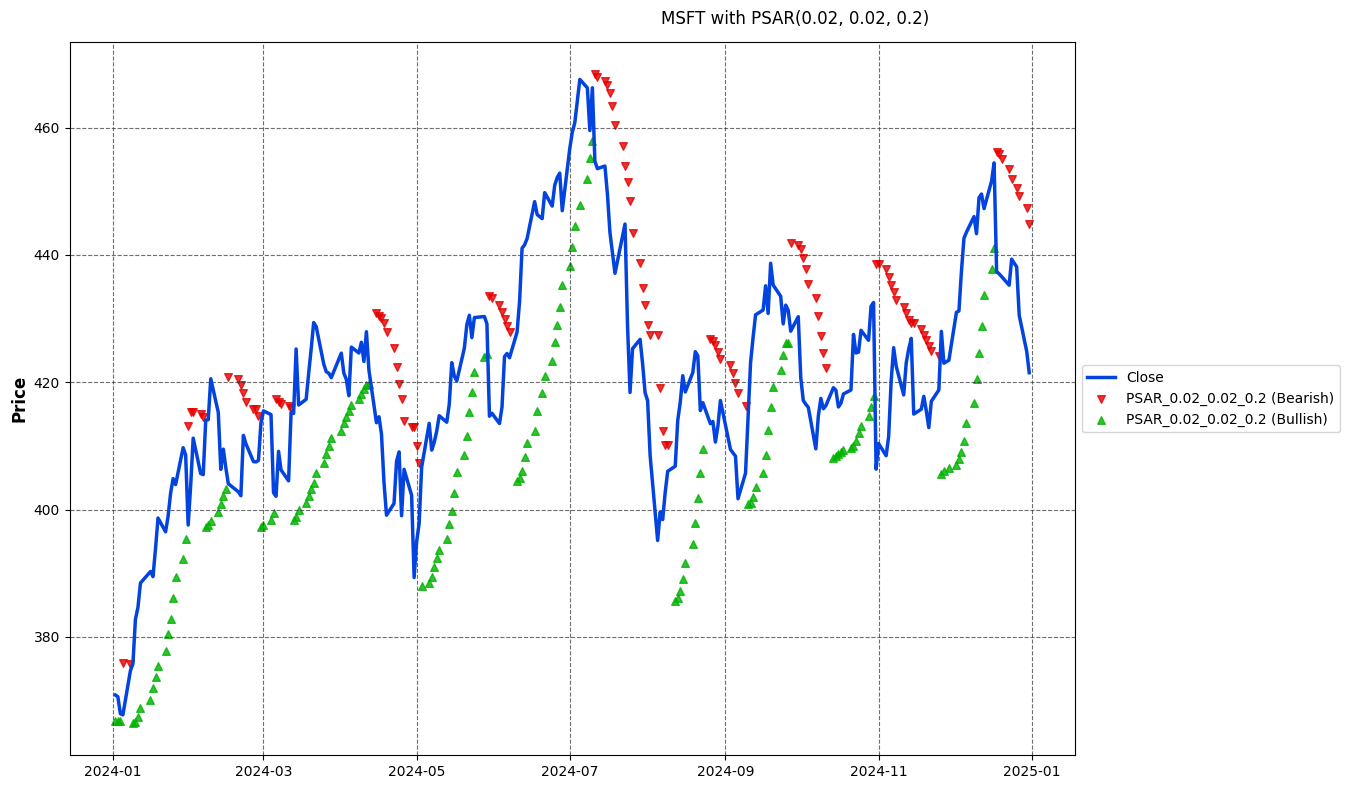

In [10]:
# Step 3: Plot the indicator
columns = [f'PSAR_{af_initial}_{af_step}_{af_max}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with PSAR({af_initial}, {af_step}, {af_max})"
    )

### The Simple Moving Average Index (SMA)


Computing SMA...


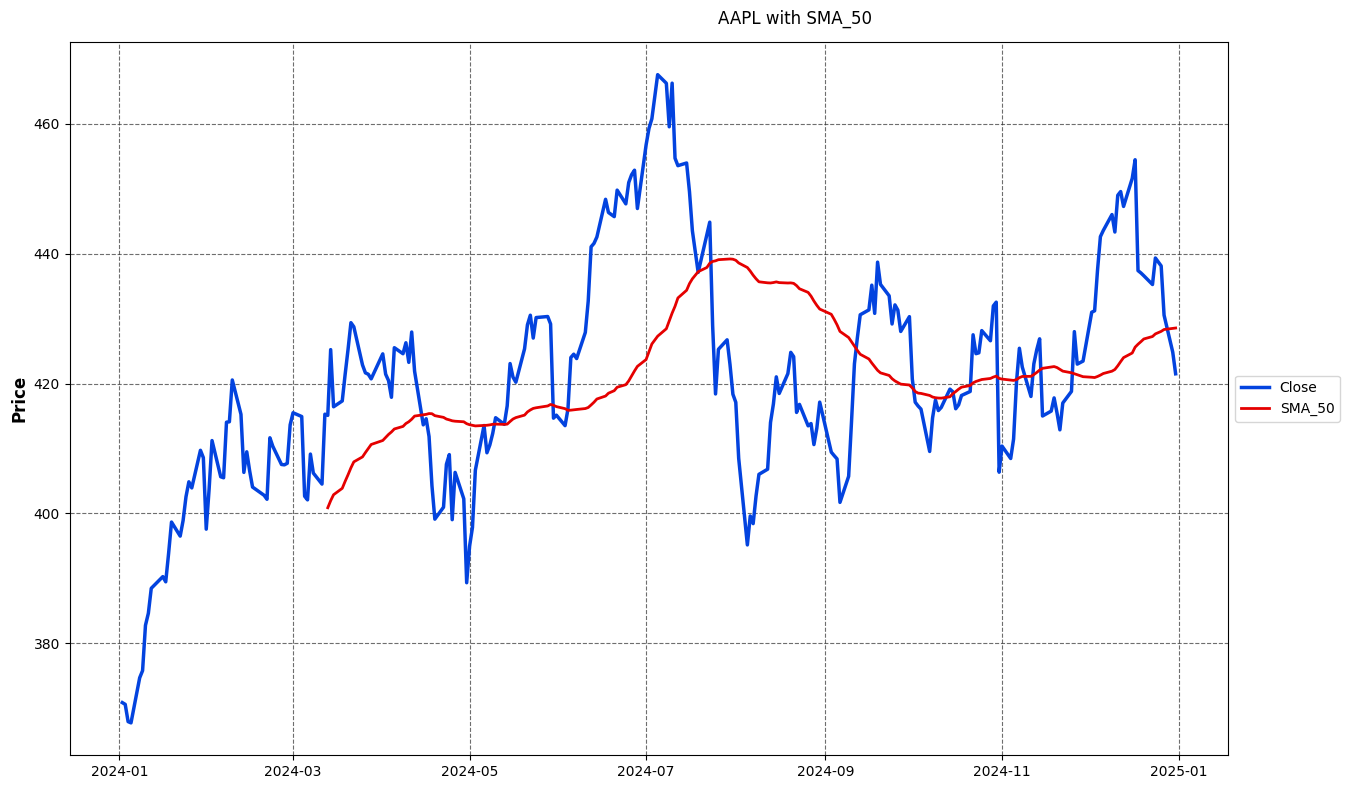

In [11]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2024-04-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
aapl = download_data(symbol, start, end, interval)

# Step 2: Calculate indicator
window=50
data = compute_indicator(
    data=data,
    indicator='sma',
    window=window,
    close_col='Close'
)

# Step 3: Plot the indicator
columns = [f'SMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with SMA_{window}"
    )

### The SuperTrend (STREND)


Computing STREND...


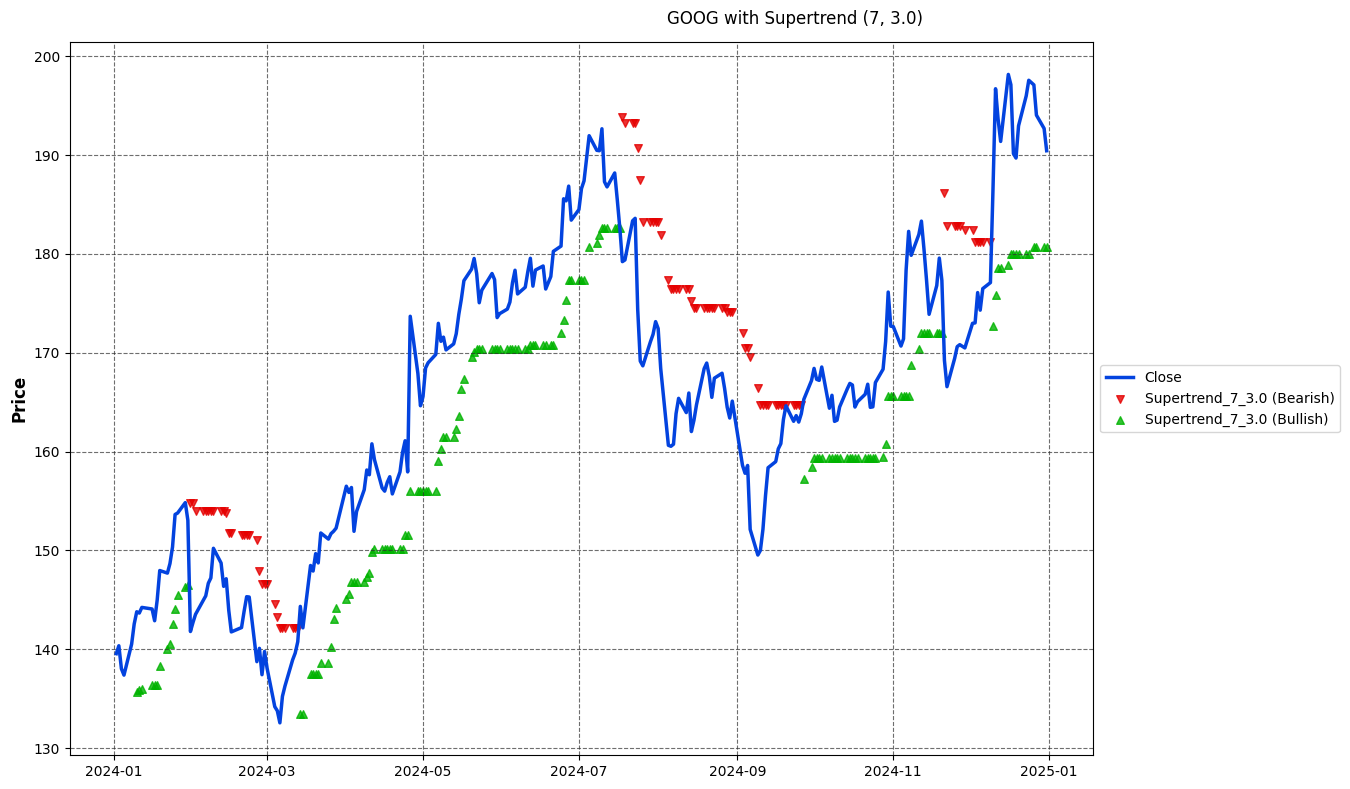

In [12]:
# Step 1: Download data
symbol = 'GOOG'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
period=7
multiplier=3.0
data = compute_indicator(
    data=data,
    period=period,
    multiplier=multiplier,
    high_col='High',
    low_col='Low',
    close_col='Close',
    indicator='strend')

columns = [f'Supertrend_{period}_{multiplier}']

fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        title=f"{symbol} with Supertrend ({period}, {multiplier})"
    )

### The Triple Exponential Average (TRIX)


Computing TRIX...


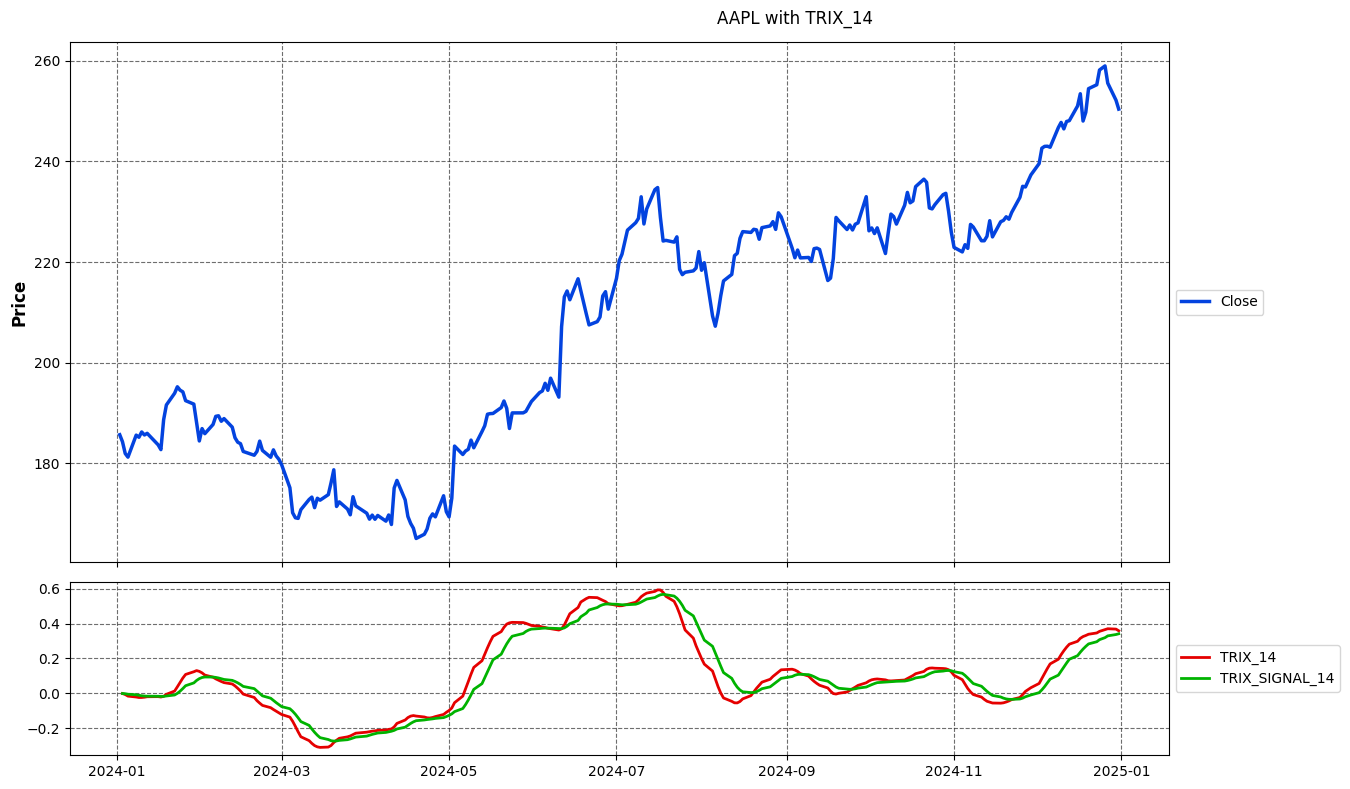

In [13]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2025-01-01'
interval = '1d'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
window=14
data = compute_indicator(
    data=data,
    indicator='trix',
    window=window,
    close_col='Close'
)

# Step 3: Plot the indicator
columns = [f'TRIX_{window}', f'TRIX_SIGNAL_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=True, 
        title=f"{symbol} with TRIX_{window}"
    )

### The Weighted Moving Average Index (WMA)


Computing WMA...


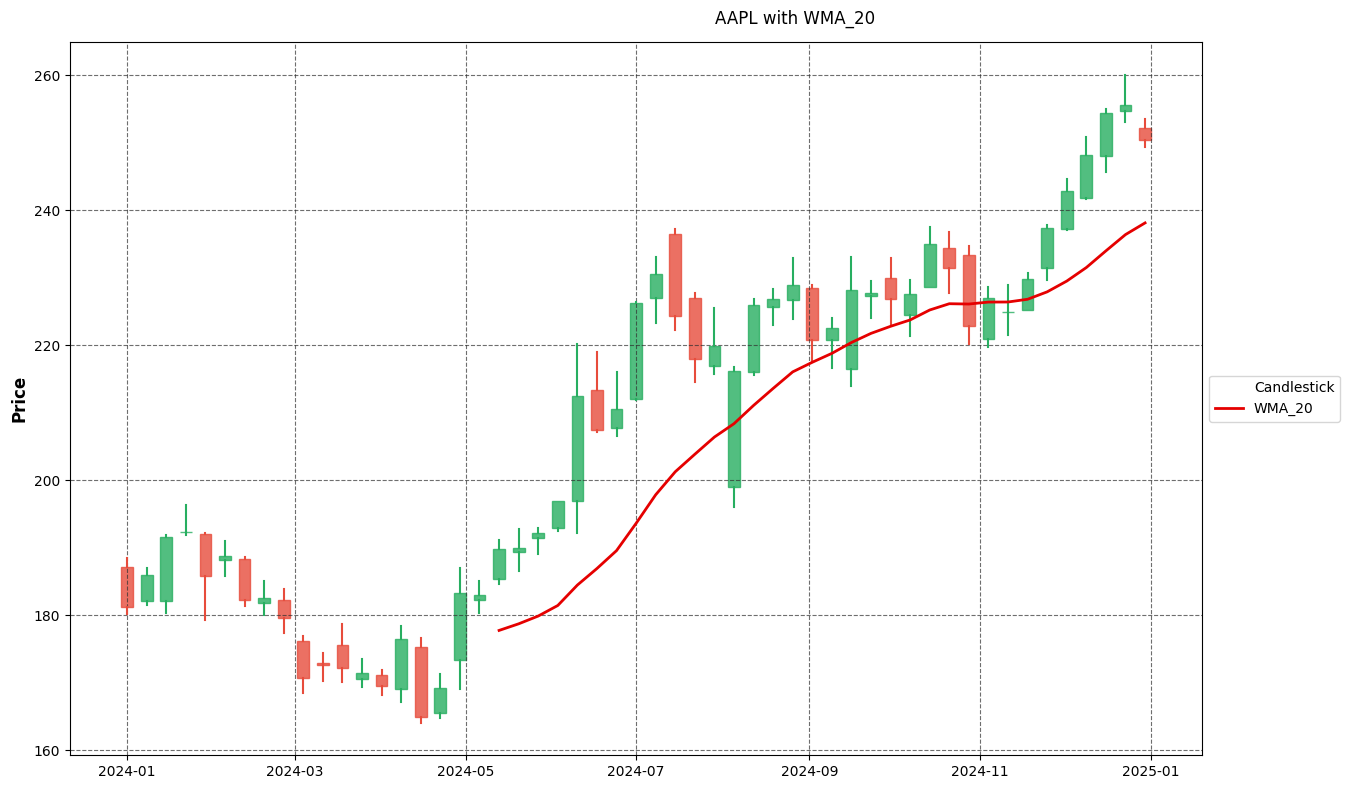

In [14]:
# Step 1: Download data
symbol = 'AAPL'
start = '2024-01-01'
end = '2025-01-01'
interval = '1wk'
print(f"\nDownloading data for {symbol}...")
data = download_data(symbol, start, end, interval=interval)

# Step 2: Calculate indicator
window=20
data = compute_indicator(
    data=data,
    indicator='wma',
    window=window,
    close_col='Close'
)

# Step 3: Plot the indicator
columns = [f'WMA_{window}']
fig = plotter.plot_results(
        data,
        price_col='Close',
        column_names=columns,
        plot_on_subplot=False, 
        plot_type='candlestick',
        title=f"{symbol} with WMA_{window}"
    )